# FACE RECOGNITION PROJECT USING PCA(principal component analysis)

In [54]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from time import time
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.decomposition import PCA
from sklearn.svm import SVC

### displaying original images

In [55]:
def show_original_images(pixels):
    fig, axes = plt.subplots(6,10,figsize=(11,7),subplot_kw={'xticks':[],'yticks':[]})
    for i ,ax in enumerate(axes.flat):
        ax.imshow(np.array(pixels)[i].reshape(64,64),cmap='gray')
    plt.show()   

###  displaying eigen faces

In [56]:
def show_eigenfaces(pca):
    fig, axes = plt.subplots(3,8,figsize=(9,4),subplot_kw={'xticks':[],'yticks':[]})
    for i,ax in enumerate(axes.flat):
        ax.imshow(pca.components_[i].reshape(64,64),cmap='gray')
    plt.show()
    

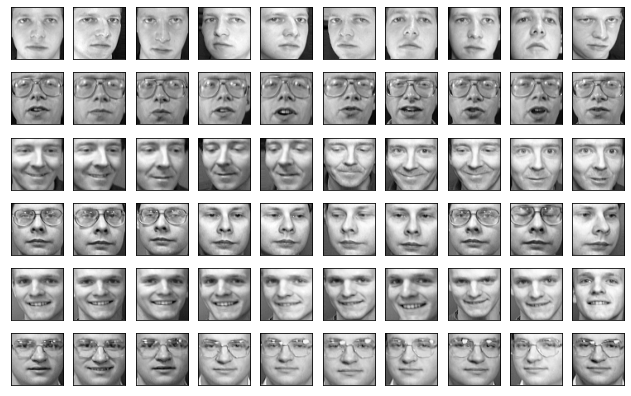

In [57]:
#step1: read dataset and visualise it
df = pd.read_csv("face_data.csv")
#df.head()
labels = df["target"]
pixels = df.drop(["target"],axis=1)
show_original_images(pixels)


In [58]:
#step2: split dataset into training and testing
x_train,x_test,y_train,y_test = train_test_split(pixels,labels)

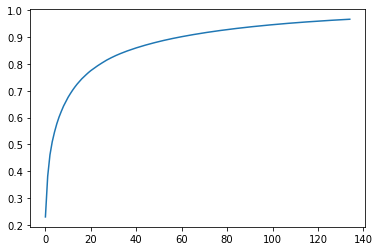

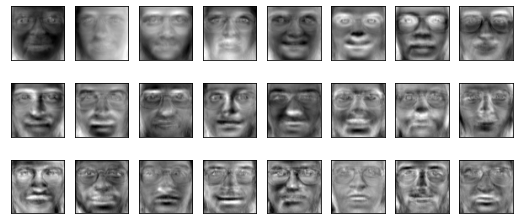

In [59]:
#step3: perform PCA
pca = PCA(n_components=135).fit(x_train)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.show()
show_eigenfaces(pca)

In [64]:
#step4: project training data to pca
x_train_pca = pca.transform(x_train)


In [65]:
#step5: intialisze classifier and fit training data
clf = SVC(kernel='rbf',C=1000,gamma=0.01)
clf = clf.fit(x_train_pca,y_train)


In [66]:
#step6: perform testing and classification report
x_test_pca = pca.transform(x_test)
y_pred = clf.predict(x_test_pca)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         2
           2       1.00      1.00      1.00         3
           3       0.67      1.00      0.80         2
           4       1.00      1.00      1.00         4
           5       1.00      1.00      1.00         3
           6       1.00      1.00      1.00         5
           8       1.00      1.00      1.00         3
           9       1.00      1.00      1.00         3
          10       1.00      1.00      1.00         1
          11       1.00      1.00      1.00         3
          12       1.00      0.50      0.67         2
          13       1.00      1.00      1.00         3
          14       1.00      1.00      1.00         2
          15       1.00      1.00      1.00         2
          16       1.00      1.00      1.00         2
          17       1.00      1.00      1.00         3
          18       1.00    